### Metagenom's Genus Classification using K-Nearest Neighbor and K-Mers Extraction.

For K-Mers Extraction Program, You can also find it in this repository : [Link](https://github.com/ryannolly/Machine-Learning-Or-Data-Science)

Written By : Ryan Ananda Nolly

This program is for fulfilling the assignment in Bioinformatics Course during my bachelor study in computer science. This is a simple KNN model to classify a Genus based on the reads or fragments of the metagenom's sequence. This will use K-Mers Extraction as a feature. You can directly use the .csv file produced by my K-Mers Extraction program.

Don't forget to put all of your .csv file in /data folder. and after that you may run all of the code below

Your path should look like this if you use google colab:

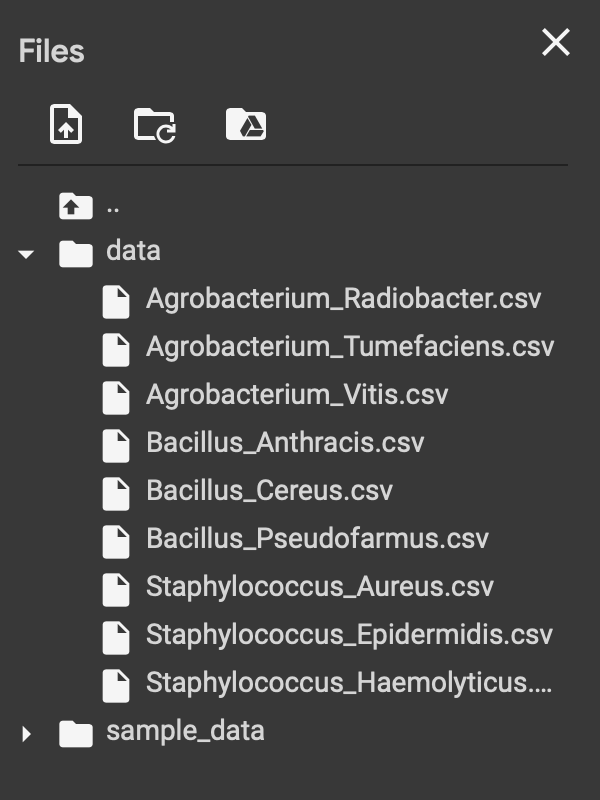

In [1]:
# Calling out the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Calling the Dataset
import os
csv_files = os.listdir('data')
data = pd.DataFrame()
for i in csv_files : 
  data_1 = pd.read_csv(os.path.join('data', i))
  data = data.append(data_1, ignore_index=True)
  
data

,Data_Name,AAA,AAT,AAG,AAC,ATA,ATT,ATG,ATC,AGA,AGT,AGG,AGC,ACA,ACT,ACG,ACC,TAA,TAT,TAG,TAC,TTA,TTT,TTG,TTC,TGA,TGT,TGG,TGC,TCA,TCT,TCG,TCC,GAA,GAT,GAG,GAC,GTA,GTT,GTG,GTC,GGA,GGT,GGG,GGC,GCA,GCT,GCG,GCC,CAA,CAT,CAG,CAC,CTA,CTT,CTG,CTC,CGA,CGT,CGG,CGC,CCA,CCT,CCG,CCC,Species,Genus
0,BA_0,6,13,6,7,9,9,7,14,4,10,1,2,3,12,2,8,12,11,4,11,7,36,11,11,6,9,6,6,18,8,5,6,7,5,0,3,14,10,4,5,3,5,0,1,3,3,3,1,7,10,8,4,8,10,5,7,2,8,2,1,5,7,3,2,Bacillus_Anthracis,Bacillus
1,BA_1,18,16,11,12,22,12,5,6,5,5,5,5,17,9,5,8,18,16,6,16,17,22,4,10,2,11,1,2,8,8,4,7,8,2,1,5,10,7,3,5,4,4,3,1,4,1,3,1,13,11,3,6,6,12,4,6,5,5,3,1,4,10,2,10,Bacillus_Anthracis,Bacillus
2,BA_2,32,17,9,15,23,12,5,8,9,4,1,4,14,12,7,7,22,10,5,10,7,9,5,8,5,4,2,4,4,4,7,6,10,7,3,6,9,1,0,2,3,2,1,0,6,3,2,3,9,14,1,9,7,7,5,3,9,2,2,6,9,3,4,11,Bacillus_Anthracis,Bacillus
3,BA_3,36,22,7,9,22,15,5,6,5,5,1,6,8,13,5,2,22,14,6,16,15,28,4,13,5,5,4,4,5,14,6,2,5,6,3,1,8,6,2,5,2,2,1,4,6,3,6,2,11,6,1,2,13,11,7,3,3,9,3,3,1,4,1,1,Bacillus_Anthracis,Bacillus
4,BA_4,18,21,6,9,19,16,5,6,3,7,4,3,10,6,4,8,18,14,6,14,17,30,10,10,5,5,4,8,8,7,3,6,8,3,2,2,11,6,3,3,4,6,2,2,0,8,5,4,10,8,3,3,5,15,4,5,3,5,3,4,6,8,3,1,Bacillus_Anthracis,Bacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,BC_95,27,14,10,9,8,8,14,9,7,5,10,3,7,7,6,6,9,13,10,7,9,6,7,6,5,8,19,2,5,7,3,5,14,8,2,8,14,9,6,2,14,13,12,5,2,5,3,2,11,4,3,2,7,5,7,3,6,5,3,2,6,3,4,4,Bacillus_Cereus,Bacillus
896,BC_96,50,14,16,12,12,16,1,10,7,11,5,5,12,5,3,6,12,15,6,9,13,38,7,12,3,3,3,4,6,13,5,7,9,2,4,2,10,6,3,3,4,2,3,4,7,3,6,1,21,8,2,3,7,10,2,6,3,6,2,4,10,4,1,7,Bacillus_Cereus,Bacillus
897,BC_97,9,14,4,5,12,19,9,10,1,6,2,3,7,6,4,4,14,19,5,14,22,51,7,20,3,11,4,7,8,18,4,7,4,4,2,0,8,13,4,2,3,5,1,0,1,6,2,1,5,13,1,2,10,17,5,5,3,5,2,0,5,7,0,2,Bacillus_Cereus,Bacillus
898,BC_98,18,14,6,9,6,20,11,4,7,4,7,3,6,10,5,4,11,12,5,7,10,14,9,12,7,10,4,6,7,7,6,5,8,8,6,6,13,6,2,3,7,3,7,4,8,2,3,3,10,7,4,3,6,5,5,7,7,6,3,3,3,4,5,2,Bacillus_Cereus,Bacillus


In [3]:
# Looking at the number of distinct lable
total = 0
for i in data[' Species'].unique() : 
  print(i)
  total = total + 1

print("The number of distinct Species : " + str(total))

total = 0
for i in data[' Genus'].unique() : 
  print(i)
  total = total + 1

print("The number of distinct Label : " + str(total))

 Bacillus_Anthracis
 Staphylococcus_Epidermidis
 Agrobacterium_Vitis
 Staphylococcus_Haemolyticus
 Agrobacterium_Tumefaciens
 Bacillus_Pseudofarmus
 Agrobacterium_Radiobacter
 Staphylococcus_Aureus
 Bacillus_Cereus
The number of distinct Species : 9
 Bacillus
 Staphylococcus
 Agrobacterium
The number of distinct Label : 3


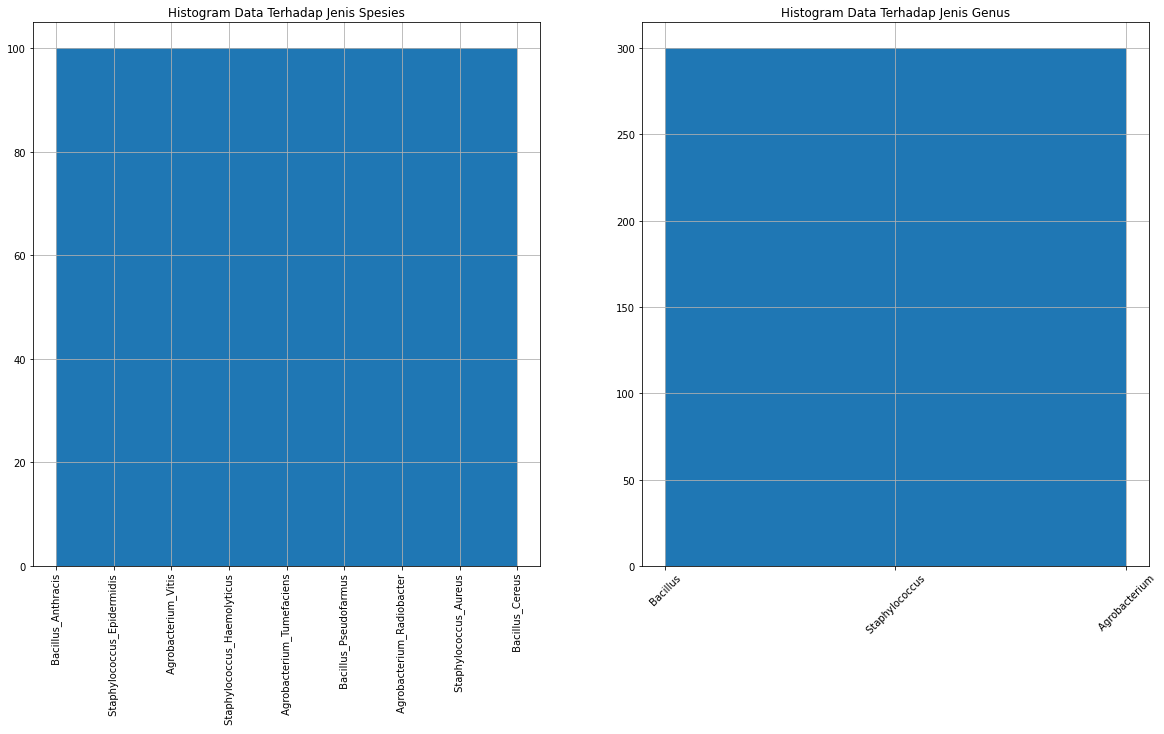

In [4]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Histogram Data Terhadap Jenis Spesies")
plt.xticks(rotation=90)
data[' Species'].hist(bins = 9)
plt.subplot(1, 2, 2)
plt.title("Histogram Data Terhadap Jenis Genus")
plt.xticks(rotation = 45)
data[' Genus'].hist(bins = 3)

In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Genus = data[' Genus'].unique()
data[' Genus'] = label_encoder.fit_transform(data[' Genus'])
Genus_Encoded = data[' Genus'].unique()
for i in range(len(Genus)) : 
  print("{} -> {}".format(Genus[i], Genus_Encoded[i]))

 Bacillus -> 1
 Staphylococcus -> 2
 Agrobacterium -> 0


In [6]:
#Splitting The X and Y Values
X = data.iloc[:, 1:-2].values
Y = data.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25)

In [8]:
#Lets look at the sample
print(X_Train)
print(X_Train.shape)

[[ 5  3 19 ...  4 23 15]
 [23 19 10 ...  4  0  3]
 [10  5  5 ...  6 12 10]
 ...
 [47 21 13 ...  4  3  3]
 [ 0  1  3 ...  2 20  7]
 [26 16  7 ...  5  2  6]]
(675, 64)


In [9]:
print(Y_Train)

[0 1 0 2 0 2 1 0 2 0 1 0 1 0 0 0 0 1 1 1 2 2 2 2 1 0 2 0 1 2 2 0 1 1 0 0 1
 2 1 2 1 0 0 1 1 1 2 2 1 1 1 0 2 2 2 2 1 1 0 1 0 1 2 1 2 2 2 1 1 0 0 1 0 1
 2 1 0 2 1 0 0 1 2 1 0 2 0 1 2 0 0 0 0 2 1 2 2 1 2 2 2 2 0 0 0 2 1 0 1 2 2
 2 0 2 2 0 1 0 1 1 2 2 2 0 2 2 0 1 1 0 2 2 1 0 1 1 0 1 0 0 2 1 2 0 2 1 0 1
 2 0 0 1 2 1 2 1 1 0 1 2 2 2 1 2 0 0 1 1 0 2 0 2 0 1 2 0 0 1 2 2 1 1 2 2 0
 0 0 1 2 0 0 0 0 2 0 2 2 2 0 0 0 1 2 2 2 1 2 0 2 1 1 0 1 0 1 2 1 1 0 0 2 0
 2 1 0 2 1 2 0 0 2 2 0 1 2 1 1 1 0 1 1 0 1 2 2 0 0 2 1 1 0 0 2 0 1 0 0 0 1
 1 1 2 0 2 2 0 0 0 2 2 2 0 0 1 2 1 1 2 0 1 0 1 1 1 2 0 1 1 1 2 1 0 0 0 0 0
 0 0 2 2 0 1 2 1 1 1 0 1 2 0 0 0 0 1 0 0 1 2 1 2 1 0 2 2 1 1 1 0 2 2 2 0 1
 2 0 0 0 0 2 0 1 1 2 1 2 0 0 1 2 0 2 0 1 2 0 1 2 1 0 0 0 0 2 2 1 2 0 1 1 0
 2 2 2 1 0 1 0 0 0 0 1 1 1 0 2 0 1 2 0 2 0 2 1 2 2 2 0 1 2 0 1 0 1 1 1 1 1
 2 0 1 2 2 0 2 0 0 2 1 1 1 1 2 2 1 1 2 1 1 1 1 2 0 0 1 1 2 0 1 1 1 1 1 2 0
 1 2 0 2 1 1 1 1 2 2 1 1 2 0 2 2 2 2 1 0 1 1 1 0 2 0 0 2 1 2 1 0 0 1 2 0 1
 0 1 0 1 2 2 2 1 2 2 0 1 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21, metric='minkowski', p = 2)
classifier.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [11]:
y_pred = classifier.predict(X_Test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_Test.reshape(len(Y_Test), 1)), 1))

[[0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 1]
 [2 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 1]
 [2 2]
 [2 1]
 [0 0]
 [2 1]
 [2 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [2 1]
 [2 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [0 0]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [0 0]
 [2 2]
 [0 0]
 [2 1]
 [2 2]
 [2 1]
 [0 0]
 [2 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 1]
 [0 1]
 [2 1]
 [2 2]
 [0 0]
 [2 2]
 [0 1]
 [2 2]
 [0 1]
 [2 2]
 [2 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 1]
 [2 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

In [12]:
#Counting The Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_Test, y_pred)
print(cm)
print('The Accuracy of the Model is : ', accuracy_score(Y_Test, y_pred))

[[75  0  0]
 [ 6 32 32]
 [ 0  5 75]]
The Accuracy of the Model is :  0.8088888888888889
